In [8]:
from sklearn import ensemble
from sklearn import preprocessing
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x1 = np.random.uniform(-1, 1, 1000)
x2 = np.random.uniform(-1, 1, 1000)
x = np.vstack([x1, x2]).transpose()
x.shape

(1000, 2)

In [5]:
def f(x1_i, x2_i):
    return 2*(x1_i**2 + x2_i**2 <= 0.5) - 1

In [6]:
y = f(x1, x2)

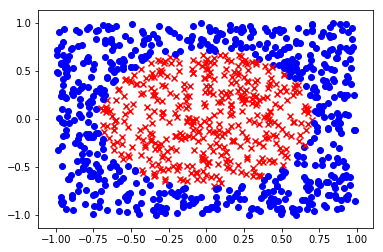

In [7]:
for (x1_i, x2_i) in zip(x1, x2):
    plt.scatter(x1_i, x2_i,
                c = ['blue' if f(x1_i, x2_i) == -1 else 'red'],
                marker='o' if f(x1_i, x2_i) == -1 else 'x')

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.7, stratify=y)

/usr/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [35]:
def perform_classification(model, data, name):
    X_train, X_test, y_train, y_test = data
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print('Model: {}'.format(name))
    print('Train report: {}'.format(metrics.classification_report(y_train, y_train_pred)))
    print('Test report: {}'.format(metrics.classification_report(y_train, y_train_pred)))

In [55]:
tree_clf = tree.DecisionTreeClassifier(max_depth=2)

In [56]:
perform_classification(tree_clf, (X_train, X_test, y_train, y_test), 'Decision Tree')

Model: Decision Tree
Train report:              precision    recall  f1-score   support

         -1       0.97      0.58      0.73       415
          1       0.62      0.97      0.75       285

avg / total       0.82      0.74      0.74       700

Test report:              precision    recall  f1-score   support

         -1       0.97      0.58      0.73       415
          1       0.62      0.97      0.75       285

avg / total       0.82      0.74      0.74       700



In [57]:
clf = ensemble.RandomForestClassifier(max_depth=2)
perform_classification(clf, (X_train, X_test, y_train, y_test), 'Random Forrest')

Model: Random Forrest
Train report:              precision    recall  f1-score   support

         -1       0.97      0.75      0.85       415
          1       0.73      0.96      0.83       285

avg / total       0.87      0.84      0.84       700

Test report:              precision    recall  f1-score   support

         -1       0.97      0.75      0.85       415
          1       0.73      0.96      0.83       285

avg / total       0.87      0.84      0.84       700



In [58]:
print('Number of created estimators: {}'.format(len(clf.estimators_)))
print('Number of created estimators: {}'.format(clf.n_estimators))

Number of created estimators: 10
Number of created estimators: 10


In [45]:
print('Klase u klasifikaciji: {}'.format(clf.classes_))

Klase u klasifikaciji: [-1  1]


In [46]:
print('Broj atributa: {}'.format(clf.n_features_))

Broj atributa: 2


In [49]:
print('Vaznost atributa: {}'.format(clf.feature_importances_))

Vaznost atributa: [0.46200876 0.53799124]
